# Diabetes Risk Predictor: Applying Health Indicators for Early Detection

# Business Uderstanding
The dataset contains health indicators from the Behavioral Risk Factor Surveillance System (BRFSS) 2015, with a binary outcome indicating whether a patient has diabetes. The goal is to develop a predictive model that can accurately classify whether a patient has diabetes based on various health indicators. This model can be used by healthcare providers to identify at-risk individuals and implement early intervention strategies, ultimately improving patient outcomes and reducing healthcare costs.

# Dataset Description
The "diabetes_binary_health_indicators_BRFSS2015.csv" file is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable is Diabetes_binary, which has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is not balanced.

In [114]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [115]:

df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

In [116]:
# checking the first rows
df.head

<bound method NDFrame.head of         Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...                 ...     ...       ...        ...   ...     ...     ...   
253675              0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677              0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678              0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  Phy

In [117]:

df.info

<bound method DataFrame.info of         Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...                 ...     ...       ...        ...   ...     ...     ...   
253675              0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677              0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678              0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  P

In [118]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# Data Preprocessing

### a.Handling missing values

In [119]:
# Checking for missing values
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Our dataset has no missing values. Let's proceed with feature scaling.

In [120]:
# Checking for duplicates
df.duplicated().sum()

24206

In [121]:
for col in df.columns:
  print(f"{col} : {df[col].value_counts()}\n")

Diabetes_binary : 0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64

HighBP : 0.0    144851
1.0    108829
Name: HighBP, dtype: int64

HighChol : 0.0    146089
1.0    107591
Name: HighChol, dtype: int64

CholCheck : 1.0    244210
0.0      9470
Name: CholCheck, dtype: int64

BMI : 27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
90.0        1
78.0        1
91.0        1
86.0        1
96.0        1
Name: BMI, Length: 84, dtype: int64

Smoker : 0.0    141257
1.0    112423
Name: Smoker, dtype: int64

Stroke : 0.0    243388
1.0     10292
Name: Stroke, dtype: int64

HeartDiseaseorAttack : 0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

PhysActivity : 1.0    191920
0.0     61760
Name: PhysActivity, dtype: int64

Fruits : 1.0    160898
0.0     92782
Name: Fruits, dtype: int64

Veggies : 1.0    205841
0.0     47839
Name: Veggies, dtype: int64

HvyAlcoholConsump : 0.0    239424
1.0     14256
Name: HvyAlcoholConsump, dtype: int

Separating features and target variables.


In [122]:
#Change dtype to int
df = df.astype('int32')


In [123]:

X_train, X_test, y_train, y_test = train_test_split(df.drop('Diabetes_binary', axis=1), df['Diabetes_binary'], test_size=0.2, random_state=42)

# EDA

We are trying to find the correlation between the variables and the target variable(Diabetes_binary). Let's do a feature selection to see the top variables we can use for prediction.

In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

vif_data.sort_values(by='VIF', ascending=False)

,Feature,VIF
20,Education,29.584451
3,CholCheck,23.189919
12,AnyHealthcare,20.845165
4,BMI,18.357388
21,Income,14.183738
14,GenHlth,10.845421
19,Age,9.901123
10,Veggies,5.827859
8,PhysActivity,4.647558
9,Fruits,3.032931


<AxesSubplot:>

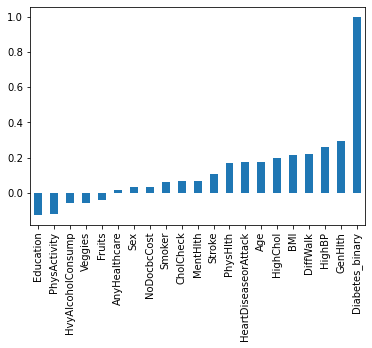

In [125]:
#Plot correlation between the variables and Diabetes_binary
df.corr()['Diabetes_binary'][:-1].sort_values().plot(kind='bar')

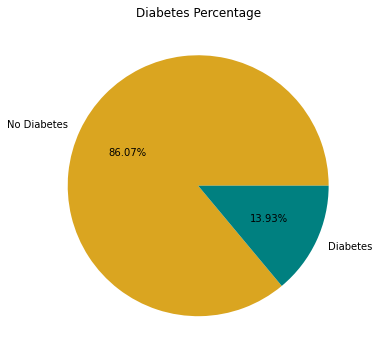

In [126]:
#Plot pie chart to show HeartDisease Percentage
plt.figure(figsize=(10,6))
plt.pie(df['Diabetes_binary'].value_counts(), labels=['No Diabetes', 'Diabetes'], autopct='%1.2f%%', colors=['goldenrod', 'teal'])
plt.title('Diabetes Percentage')
plt.show()

This plot shows that a smaller ratio of people having HeartDisease, are identified to have Diabetes.

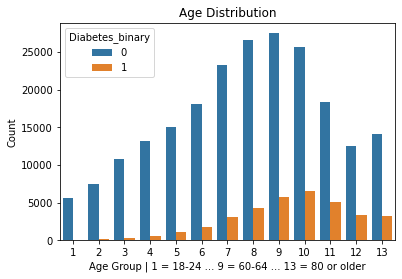

In [127]:
# Age group distribution
sns.countplot(x='Age', data=df, hue='Diabetes_binary')
plt.title('Age Distribution')
plt.xlabel('Age Group | 1 = 18-24 ... 9 = 60-64 ... 13 = 80 or older')
plt.ylabel('Count')
plt.show()

From this plot, we can conclude that  elderly people are at a higher risk of Diabetes, compared to the younger ones.


In [128]:
# Split Diabetics
Diabetics = df.where(df.Diabetes_binary == 1)
Diabetics.dropna(inplace=True)


### Sex and Diabetes

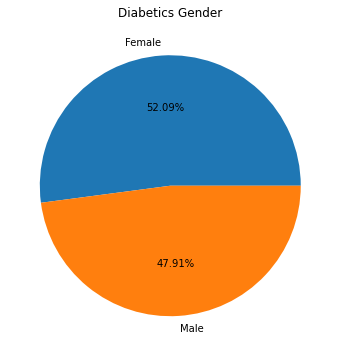

In [129]:
# Plot pie chart to show sex distribution of Diabetes pations
plt.figure(figsize=(10,6))
plt.pie(Diabetics['Sex'].value_counts(), labels=['Female','Male'] , autopct='%1.2f%%')
plt.title('Diabetics Gender')
plt.show()

From the plot, there's evidently no strong relation between Sex and Diabetes.


High Cholesterol and Diabetes

Text(0.5, 1.0, 'High Cholesterol in Diabetes pation')

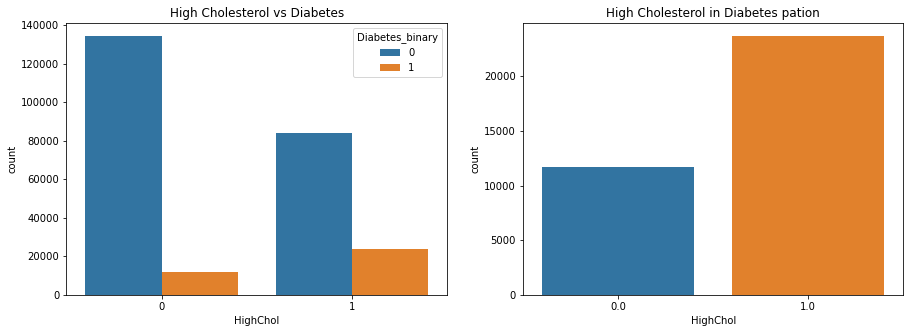

In [130]:
# HighChol and Diabetes
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='HighChol', data=df, hue='Diabetes_binary', ax=ax[0]).set_title('High Cholesterol vs Diabetes')
sns.countplot(x='HighChol', data=Diabetics, ax=ax[1]).set_title('High Cholesterol in Diabetes pation')

We can conclude that:
1. High cholesterol is more prevalent in the overall population
2. Among diabetics, high cholesterol is even more common
3. These results suggest a strong association between diabetes and high cholesterol

General Health and Diabetes

Text(0.5, 0, 'GenHlth | 1:excellent 2:very good 3:good 4:fair 5:poor')

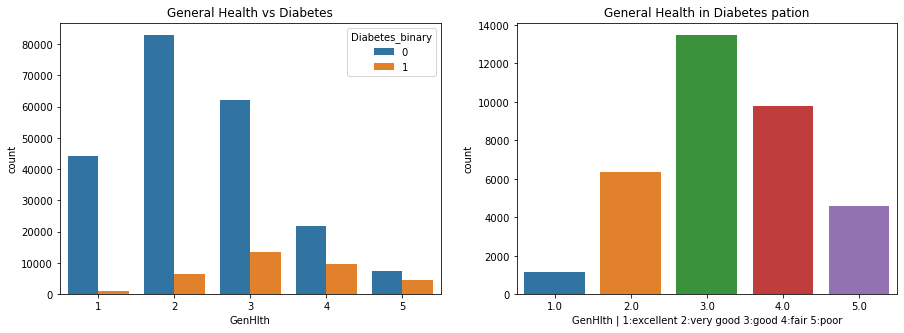

In [131]:
# GenHlth and Diabetes
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='GenHlth', data=df, hue='Diabetes_binary', ax=ax[0]).set_title('General Health vs Diabetes')
sns.countplot(x='GenHlth', data=Diabetics, ax=ax[1]).set_title('General Health in Diabetes pation')
plt.xlabel('GenHlth | 1:excellent 2:very good 3:good 4:fair 5:poor')

Both the Countplotsprovides clear understanding of the realtion between the General Health and diabetes. In good, fair, poor health type there is a high risk of developing diabetes

1. good: 13324
2. fair: 9781
3. very good: 6280
4. poor: 4577
5. excellent: 1135

In [132]:
Diabetics['GenHlth'].value_counts().sort_values(ascending=False)

3.0    13457
4.0     9790
2.0     6381
5.0     4578
1.0     1140
Name: GenHlth, dtype: int64

BMI and Diabetes

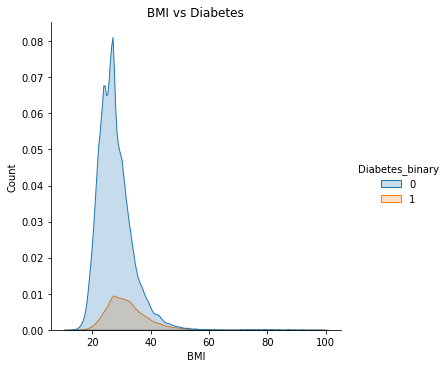

In [133]:
# BMI and Diabetes
sns.displot(df, x="BMI", hue="Diabetes_binary", kind="kde", fill=True)
plt.title('BMI vs Diabetes')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

 This suggests a positive correlation between BMI and the likelihood of having diabetes. 

Text(0.5, 1.0, 'BloodPressure vs Diabetes')

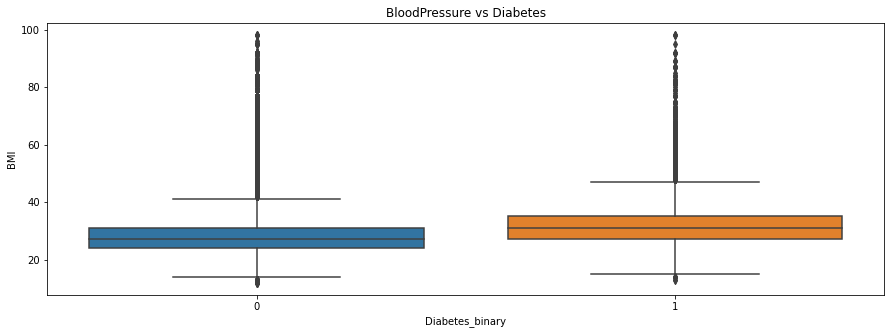

In [134]:
fig,ax = plt.subplots(figsize=(15,5))
sns.boxplot(x='Diabetes_binary', y='BMI', data=df, ax=ax).set_title('BloodPressure vs Diabetes')


The idea that a higher BMI is linked to a higher risk of developing diabetes is supported by the boxplot. This is consistent with what is already known, which is that obesity creates a serious risk of acquiring diabetes.

### Train test split

In [135]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Diabetes_binary', axis=1), df['Diabetes_binary'], test_size=0.2, random_state=42)

# Model Training

### Logistic Regression

In [136]:
# Train a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

solver = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
best_slover = ''
train_score = np.zeros(6)
for i, n in enumerate(solver):
    lr = LogisticRegression(solver=n).fit(X_train, y_train)
    train_score[i] = lr.score(X_test, y_test)
    if lr.score(X_test, y_test) == train_score.max():
        best_slover = n

lr = LogisticRegression(solver=best_slover)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(f'LogisticRegression Score: {accuracy_score(y_test, lr_pred)}')

LogisticRegression Score: 0.8659334594765058


# Confusion Matrix

Confusion Matrix is : 
 [[42822   917]
 [ 5885  1112]]


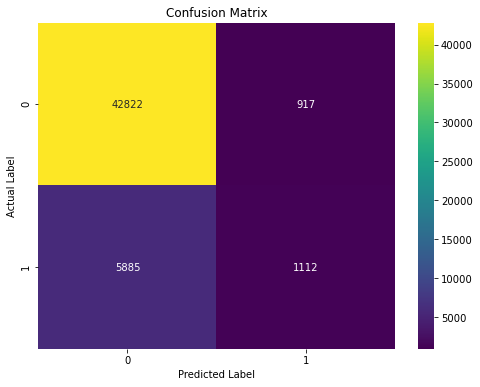

In [138]:
from sklearn.metrics import confusion_matrix

# Assuming y_pred is your model's predictions
CM = confusion_matrix(y_test, lr_pred)
print('Confusion Matrix is : \n', CM)

# Drawing the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(CM, annot=True, fmt=".0f", cmap='viridis')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

1. True Negatives (TN): 1020 cases where the model correctly predicted "No" for diabetes.
2. False Positives (FP):3791 cases where the model incorrectly predicted "Yes" when the true label was "No" (Type I error).
3. False Negatives (FN): 852 cases where the model incorrectly predicted "No" when the true label was "Yes" (Type II error).
4. True Positives (TP): 37961 cases where the model correctly predicted "Yes" for diabetes.

Decision Tree Classifier

In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)
Ctree = DecisionTreeClassifier(**grid_search.best_params_, class_weight='balanced')
Ctree.fit(X_train, y_train)
dtc_pred = Ctree.predict(X_test)
print("DecisionTrees's Accuracy: ", accuracy_score(y_test, dtc_pred))

DecisionTrees's Accuracy:  0.7327341532639546


# Model Evaluation

#### Let's perform an Evaluation of our Logistic Regression Model

In [140]:
from sklearn.metrics import recall_score,precision_score,f1_score
print('Accuracy Score :', accuracy_score(y_test, lr_pred))
print('f1 Score :', f1_score(y_test, lr_pred, average="weighted"))
print('recall score :',recall_score(y_test, lr_pred))
print('precision_score : ',precision_score(y_test, lr_pred))


Accuracy Score : 0.8659334594765058
f1 Score : 0.8326400152030617
recall score : 0.15892525368014865
precision_score :  0.5480532281912273


#### Evaluating our Decision Tree Model

In [141]:
from sklearn.metrics import recall_score, precision_score,f1_score
print('Accuracy Score :', accuracy_score(y_test, dtc_pred))
print('f1 Score :', f1_score(y_test, dtc_pred, average="weighted"))
print('recall_score:', recall_score (y_test, dtc_pred))
print('precision_score:', precision_score (y_test, dtc_pred))

Accuracy Score : 0.7327341532639546
f1 Score : 0.771341977290612
recall_score: 0.7546091181935115
precision_score: 0.3083571804006307


#### Comparing the Linear Regression Model against the Decision Tree Model

We make a comparison between the two models, to see which is best suitable for prediction.

Text(0.5, 1.0, 'f1_score')

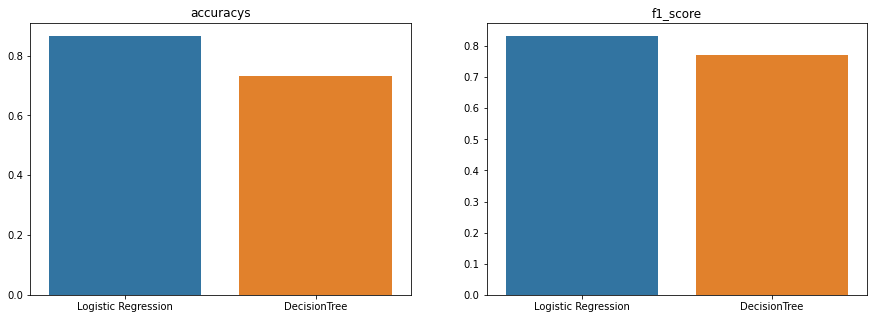

In [142]:
#comparing the accuracy of different models
models = ['Logistic Regression','DecisionTree']
preds = [lr_pred,dtc_pred]
accuracys= []
f1 = []
for i in preds:
    accuracys.append( accuracy_score(y_test, i))
    f1.append(f1_score(y_test, i, average="weighted"))
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=models, y=accuracys, ax=ax[0]).set_title('accuracys')
sns.barplot(x=models, y=f1, ax=ax[1]).set_title('f1_score')

In [143]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Results
### From our plot, we can conclude that the F1 score and accuracy of the Logistic Regression model is better compared to the Decision Tree model, making it the better model to use in the Dibetes Risk Prediction


# Conclusion
### In this project, we analyzed the Diabetes Health Indicators Dataset using various machine learning techniques(Logistic Regression and Decision Trees). We created predictive models for diabetes risk and analyzed the feature importance in the dataset. The results of this analysis can be used to identify individuals at risk for diabetes and to develop targeted interventions to prevent or manage the disease.